In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import random

In [31]:
cost_of_living = pd.read_csv('data/Family_Budget_Fact_Sheet(County).csv')
cost_of_living['county_fips'] = cost_of_living['county_fips'].astype(str).apply(lambda x: x.zfill(5))
cost_of_living

,case_id,State abv.,county_fips,County,Family,Housing,Food,Transportation,Healthcare,Other Necessities,...,Healthcare.1,Other Necessities .1,Childcare.1,Taxes.1,Total.1,median_family_income,num_counties_in_st,st_cost_rank,st_med_aff_rank,st_income_rank
0,1,AL,01001,Autauga County,1p0c,817,335,1110,510,408,...,"$6,120","$4,896",$0,"$7,488","$45,636","83,790",67,8,58,7.0
1,1,AL,01001,Autauga County,1p1c,1114,494,1365,756,570,...,"$9,072","$6,840","$6,240","$9,132","$66,960","83,790",67,8,58,7.0
2,1,AL,01001,Autauga County,1p2c,1114,723,1570,1003,651,...,"$12,036","$7,812","$12,144","$11,388","$84,252","83,790",67,8,58,7.0
3,1,AL,01001,Autauga County,1p3c,1416,966,1670,1249,843,...,"$14,988","$10,116","$13,956","$14,808","$102,492","83,790",67,8,58,7.0
4,1,AL,01001,Autauga County,1p4c,1416,1182,1742,1495,920,...,"$17,940","$11,040","$13,956","$17,688","$112,704","83,790",67,8,58,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31425,3143,WY,56045,Weston County,2p0c,741,637,1613,1304,488,...,"$15,648","$5,856",$0,"$8,028","$65,412","80,178",23,4,2,18.0
31426,3143,WY,56045,Weston County,2p1c,975,793,1791,1698,626,...,"$20,376","$7,512","$6,708","$9,576","$86,880","80,178",23,4,2,18.0
31427,3143,WY,56045,Weston County,2p2c,975,1003,1911,2091,700,...,"$25,092","$8,400","$13,152","$10,548","$103,872","80,178",23,4,2,18.0
31428,3143,WY,56045,Weston County,2p3c,1187,1225,2074,2485,854,...,"$29,820","$10,248","$15,132","$12,756","$121,812","80,178",23,4,2,18.0


In [32]:
population = pd.read_csv('data/counties.csv')
population

,County,State,FIPS Code,Population,Area,Density
0,Autauga County,Alabama,01001,59095,594,99
1,Baldwin County,Alabama,01003,239294,1589,151
2,Barbour County,Alabama,01005,24964,884,28
3,Bibb County,Alabama,01007,22477,622,36
4,Blount County,Alabama,01009,59041,644,92
...,...,...,...,...,...,...
3089,Sweetwater County,Wyoming,56037,41614,10426,4
3090,Teton County,Wyoming,56039,23575,4008,6
3091,Uinta County,Wyoming,56041,20635,2082,10
3092,Washakie County,Wyoming,56043,7705,2240,3


In [33]:
# fixing new york
population.loc[population['State'] == 'New York', 'Density'] = population.loc[population['State'] == 'New York', 'Population']
population[population['State'] == 'New York']

,County,State,FIPS Code,Population,Area,Density
1818,Albany County,New York,36001,588,533,588
1819,Allegany County,New York,36003,44,1034,44
1820,Bronx County,New York,36005,24811,57,24811
1821,Broome County,New York,36007,275,715,275
1822,Cattaraugus County,New York,36009,58,1310,58
...,...,...,...,...,...,...
1875,Washington County,New York,36115,72,846,72
1876,Wayne County,New York,36117,65,1384,65
1877,Westchester County,New York,36119,1995,500,1995
1878,Wyoming County,New York,36121,67,596,67


In [34]:
df = pd.read_csv('data/asecpub23csv/hhpub23.csv', usecols=['HTOTVAL', 'H_NUMPER', 'GTCO', 'GESTFIPS', 'HSUP_WGT', 'HUNDER18'])

# remove all rows with missing data
df = df[(df['GTCO'] != 0) & (df['GESTFIPS'] != 0) & (df['HTOTVAL'] != 0)]
df['Family Type'] = [f"{min(row['H_NUMPER'] - row['HUNDER18'], 2)}p{min(row['HUNDER18'], 4)}c" for index, row in df.iterrows()]
df = df.drop(columns=['HUNDER18'])

df

,GESTFIPS,H_NUMPER,HSUP_WGT,HTOTVAL,GTCO,Family Type
50,23,6,60721,177585,11,2p1c
284,23,2,249073,39576,11,2p0c
285,23,2,119153,126961,11,2p0c
289,23,2,52787,128161,11,2p0c
290,23,1,149570,804,11,1p0c
...,...,...,...,...,...,...
88973,15,4,36445,96000,3,2p1c
88974,15,2,68296,173540,3,2p0c
88975,15,6,44578,211102,3,2p2c
88976,15,5,41320,90415,3,2p2c


In [35]:
N = 10_000
sample_df = df.sample(n=N, weights=df['HSUP_WGT'], replace=True)
sample_df

,GESTFIPS,H_NUMPER,HSUP_WGT,HTOTVAL,GTCO,Family Type
47551,12,4,166336,33801,5,1p3c
30684,20,1,252377,11299,173,1p0c
21673,26,1,259905,48097,81,1p0c
36078,51,3,269799,70001,177,2p1c
17098,18,2,313496,195382,39,2p0c
...,...,...,...,...,...,...
62778,48,3,285619,175000,439,2p1c
12743,42,4,239844,53000,49,2p2c
10229,36,2,375079,533610,67,2p0c
36401,51,4,405299,176661,107,2p0c


In [36]:
# import random

# # 'calculate' time
# sample_df['Free Time'] = [ 1 + random.normalvariate(0,0.2) for _ in range(N)]

# calculating FIPS codes

sample_df['GESTFIPS'] = sample_df['GESTFIPS'].astype(str).apply(lambda x: x.zfill(2))
sample_df['GTCO'] = sample_df['GTCO'].astype(str).apply(lambda x: x.zfill(3))
sample_df['Code'] = sample_df['GESTFIPS'] + sample_df['GTCO']

sample_df = sample_df.drop(columns=['GESTFIPS', 'GTCO'])

# renaming cost of income
sample_df = sample_df.rename(columns={'HTOTVAL': 'Income'})

sample_df


,H_NUMPER,HSUP_WGT,Income,Family Type,Code
47551,4,166336,33801,1p3c,12005
30684,1,252377,11299,1p0c,20173
21673,1,259905,48097,1p0c,26081
36078,3,269799,70001,2p1c,51177
17098,2,313496,195382,2p0c,18039
...,...,...,...,...,...
62778,3,285619,175000,2p1c,48439
12743,4,239844,53000,2p2c,42049
10229,2,375079,533610,2p0c,36067
36401,4,405299,176661,2p0c,51107


In [37]:
# adding population density
sample_df = pd.merge(sample_df, population, left_on='Code', right_on='FIPS Code')
sample_df = sample_df.drop(columns=['FIPS Code'])

sample_df

,H_NUMPER,HSUP_WGT,Income,Family Type,Code,County,State,Population,Area,Density
0,4,166336,33801,1p3c,12005,Bay County,Florida,179168,764,235
1,3,508346,115576,2p0c,12005,Bay County,Florida,179168,764,235
2,2,418975,13757,2p0c,12005,Bay County,Florida,179168,764,235
3,1,301645,16678,1p0c,12005,Bay County,Florida,179168,764,235
4,1,503237,43002,1p0c,12005,Bay County,Florida,179168,764,235
...,...,...,...,...,...,...,...,...,...,...
9858,2,716022,36000,2p0c,48251,Johnson County,Texas,187280,729,257
9859,7,435282,90000,2p4c,48251,Johnson County,Texas,187280,729,257
9860,1,394346,16442,1p0c,34011,Cumberland County,New Jersey,153627,489,314
9861,2,442474,105123,2p0c,34011,Cumberland County,New Jersey,153627,489,314


In [38]:
# adding cost of living

cost_of_living['Family'] = cost_of_living['Family'].astype(str)
sample_df['Family Type'] = sample_df['Family Type'].astype(str)

sample_df = pd.merge(sample_df, cost_of_living[['county_fips', 'Family', 'Total.1']], 
                     left_on=['Code', 'Family Type'], 
                     right_on=['county_fips', 'Family'])

sample_df = sample_df.drop(columns=['county_fips'])

sample_df['Cost of Living'] = [int(row['Total.1'].strip("$").replace(',', '_')) for index, row in sample_df.iterrows() ]

sample_df


,H_NUMPER,HSUP_WGT,Income,Family Type,Code,County,State,Population,Area,Density,Family,Total.1,Cost of Living
0,4,166336,33801,1p3c,12005,Bay County,Florida,179168,764,235,1p3c,"$105,312",105312
1,3,508346,115576,2p0c,12005,Bay County,Florida,179168,764,235,2p0c,"$62,112",62112
2,2,418975,13757,2p0c,12005,Bay County,Florida,179168,764,235,2p0c,"$62,112",62112
3,2,427093,145809,2p0c,12005,Bay County,Florida,179168,764,235,2p0c,"$62,112",62112
4,2,426607,147004,2p0c,12005,Bay County,Florida,179168,764,235,2p0c,"$62,112",62112
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9858,7,435282,90000,2p4c,48251,Johnson County,Texas,187280,729,257,2p4c,"$126,168",126168
9859,7,435282,90000,2p4c,48251,Johnson County,Texas,187280,729,257,2p4c,"$126,168",126168
9860,1,394346,16442,1p0c,34011,Cumberland County,New Jersey,153627,489,314,1p0c,"$48,192",48192
9861,2,442474,105123,2p0c,34011,Cumberland County,New Jersey,153627,489,314,2p0c,"$61,812",61812


In [39]:
land_area = pd.read_csv("data/RDC_Inventory_Core_Metrics_County_History.csv")
# land_area.sort_values('county_fips')
land_area = land_area[(land_area['month_date_yyyymm']) > 2020_00]
land_area['county_fips'] = land_area['county_fips'].astype(str).apply(lambda x: x.zfill(5))
land_area = land_area[['median_square_feet', 'county_fips']]

land_area

,median_square_feet,county_fips
0,1623.0,37199
1,1969.0,42077
2,1782.0,36011
3,2771.0,31093
4,1830.0,48147
...,...,...
155238,1722.0,47131
155239,1768.0,20165
155240,1849.0,30099
155241,1819.0,18131


In [40]:
county_land_area = {}
state_land_area = {}

for index, row in land_area.iterrows():
    code = row['county_fips']
    state = code[:3]

    if code not in county_land_area:
        county_land_area[code] = [index]
    else:
        county_land_area[code].append(index)

    if state not in state_land_area:
        state_land_area[state] = [index]
    else:
        state_land_area[state].append(index)

In [41]:

def select_random_row(county_code):
    if county_code in county_land_area:
        index = random.choice(county_land_area[county_code])
        return land_area.iloc[index]

    state = county_code[:3]
    index = random.choice(state_land_area[state])
    return land_area.iloc[index]

houses = sample_df['Code'].apply(select_random_row)

In [42]:
sample_df = pd.concat([sample_df.reset_index(), houses[['median_square_feet']]], axis=1)
sample_df

,index,H_NUMPER,HSUP_WGT,Income,Family Type,Code,County,State,Population,Area,Density,Family,Total.1,Cost of Living,median_square_feet
0,0,4,166336,33801,1p3c,12005,Bay County,Florida,179168,764,235,1p3c,"$105,312",105312,1600.0
1,1,3,508346,115576,2p0c,12005,Bay County,Florida,179168,764,235,2p0c,"$62,112",62112,1453.0
2,2,2,418975,13757,2p0c,12005,Bay County,Florida,179168,764,235,2p0c,"$62,112",62112,1441.0
3,3,2,427093,145809,2p0c,12005,Bay County,Florida,179168,764,235,2p0c,"$62,112",62112,1542.0
4,4,2,426607,147004,2p0c,12005,Bay County,Florida,179168,764,235,2p0c,"$62,112",62112,1692.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9858,9858,7,435282,90000,2p4c,48251,Johnson County,Texas,187280,729,257,2p4c,"$126,168",126168,2210.0
9859,9859,7,435282,90000,2p4c,48251,Johnson County,Texas,187280,729,257,2p4c,"$126,168",126168,2224.0
9860,9860,1,394346,16442,1p0c,34011,Cumberland County,New Jersey,153627,489,314,1p0c,"$48,192",48192,1434.0
9861,9861,2,442474,105123,2p0c,34011,Cumberland County,New Jersey,153627,489,314,2p0c,"$61,812",61812,1487.0


In [43]:
# clean up
sample_df = sample_df.rename(columns={"H_NUMPER": "Number of People", "median_square_feet": "Floor Area"})
sample_df['Floor Area'] = sample_df['Floor Area'] * 0.09290304
sample_df['Density'] = sample_df['Density'] * 0.3861274922774502
sample_df

,index,Number of People,HSUP_WGT,Income,Family Type,Code,County,State,Population,Area,Density,Family,Total.1,Cost of Living,Floor Area
0,0,4,166336,33801,1p3c,12005,Bay County,Florida,179168,764,90.739961,1p3c,"$105,312",105312,148.644864
1,1,3,508346,115576,2p0c,12005,Bay County,Florida,179168,764,90.739961,2p0c,"$62,112",62112,134.988117
2,2,2,418975,13757,2p0c,12005,Bay County,Florida,179168,764,90.739961,2p0c,"$62,112",62112,133.873281
3,3,2,427093,145809,2p0c,12005,Bay County,Florida,179168,764,90.739961,2p0c,"$62,112",62112,143.256488
4,4,2,426607,147004,2p0c,12005,Bay County,Florida,179168,764,90.739961,2p0c,"$62,112",62112,157.191944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9858,9858,7,435282,90000,2p4c,48251,Johnson County,Texas,187280,729,99.234766,2p4c,"$126,168",126168,205.315718
9859,9859,7,435282,90000,2p4c,48251,Johnson County,Texas,187280,729,99.234766,2p4c,"$126,168",126168,206.616361
9860,9860,1,394346,16442,1p0c,34011,Cumberland County,New Jersey,153627,489,121.244033,1p0c,"$48,192",48192,133.222959
9861,9861,2,442474,105123,2p0c,34011,Cumberland County,New Jersey,153627,489,121.244033,2p0c,"$61,812",61812,138.146820


In [44]:
import random

# 'calculate' time
sample_df['Free Time'] = [ -0.0005*row['Density'] + 8 + random.normalvariate(0,3) for index, row in sample_df.iterrows()]

In [45]:
from modelcat import get_HPFI, get_income_index, get_space_index, get_time_index
import numpy as np

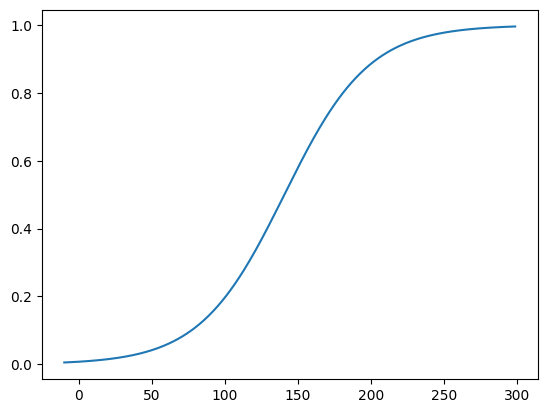

In [46]:
X = np.arange(-10, 300)
Y = np.array([get_space_index(100000000000, 1, x, 0) for x in X])

plt.plot(X,Y)
# get_space_index()

(array([381., 372., 366., 416., 541., 550., 540., 484., 457., 427., 407.,
        367., 396., 374., 387., 454., 514., 641., 845., 944.]),
 array([1.38310550e-04, 5.00859482e-02, 1.00033586e-01, 1.49981223e-01,
        1.99928861e-01, 2.49876499e-01, 2.99824136e-01, 3.49771774e-01,
        3.99719412e-01, 4.49667049e-01, 4.99614687e-01, 5.49562324e-01,
        5.99509962e-01, 6.49457600e-01, 6.99405237e-01, 7.49352875e-01,
        7.99300512e-01, 8.49248150e-01, 8.99195788e-01, 9.49143425e-01,
        9.99091063e-01]),
 <BarContainer object of 20 artists>)

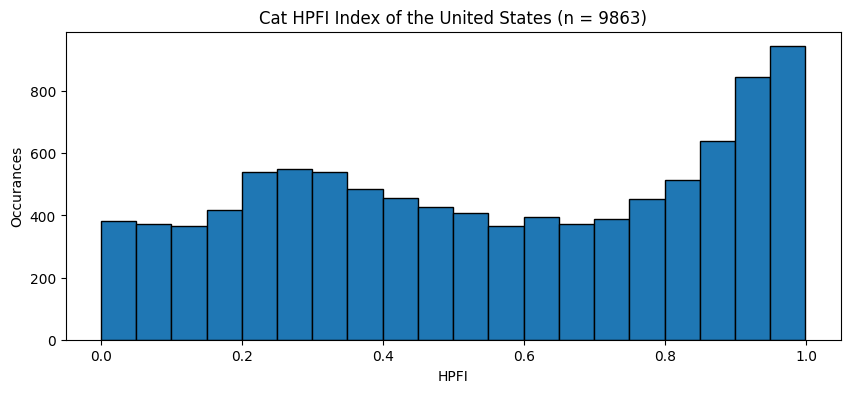

In [47]:
sample_HPFI = []
sample_II   = []
sample_SI   = []
sample_TI   = []

urban_floor_area = []

for index, row in sample_df.iterrows():
    number_of_people    = row['Number of People']
    income              = row['Income']
    free_time           = row['Free Time']
    density             = row['Density']
    cost_of_living      = row['Cost of Living']
    floor_area          = row['Floor Area']

    if density >= 3000:
        if number_of_people == 1:
            floor_area = random.normalvariate(70, 10)
        if number_of_people == 2:
            floor_area = random.normalvariate(90, 10)
        if number_of_people == 3:
            floor_area = random.normalvariate(100, 10)
        if number_of_people == 4:
            floor_area = random.normalvariate(120, 10)
        
        urban_floor_area.append(floor_area)

    outside_area        = 100000/(density+1)

    HPFI    = get_HPFI(density, cost_of_living, income, number_of_people, free_time, floor_area, outside_area)
    II      = get_income_index(income, cost_of_living)
    SI      = get_space_index(density, number_of_people, floor_area, outside_area)
    TI      = get_time_index(free_time)

    sample_HPFI.append(HPFI)
    sample_II.append(II)
    sample_SI.append(SI)
    sample_TI.append(TI)

# sample_HPFI
plt.figure(figsize=(10, 4))
plt.title(f'Cat HPFI Index of the United States (n = {len(sample_HPFI)})')
plt.xlabel('HPFI')
plt.ylabel('Occurances')
plt.hist(sample_HPFI, bins=20, edgecolor="black")


In [48]:
urban_floor_area

[66.4970319608986,
 73.92852201632253,
 64.98367243881349,
 70.61993587998145,
 64.13114617709714,
 53.43483773421141,
 65.70419652411647,
 87.09673671518082,
 85.24770846200069,
 81.55752438264783,
 76.47940285408205,
 76.32526897912952,
 76.0430799187503,
 56.08643140626902,
 73.51615472057247,
 68.72200331458897,
 63.104512509174114,
 68.73404892915502,
 77.87684529936236,
 57.4160554554518,
 82.25872939485929,
 64.29480281430321,
 76.20953604122471,
 72.31227949994891,
 60.13253012191833,
 62.15184869193013,
 74.4425050882542,
 87.75911752196383,
 84.69034920206015,
 76.02268316992817,
 66.09447842809234,
 80.23815744099468,
 85.68200548811166,
 93.82880599182961,
 71.33604292613023,
 59.90749948313878,
 75.88110455858448,
 81.09453998899991,
 73.53816698650802,
 76.44363705193138,
 69.13456139946813,
 79.19732147966862,
 78.82908489099306,
 62.636104159368415,
 94.99777819391157,
 57.00303403735536,
 64.40490032542576,
 81.59547852789713,
 77.99882313431822,
 68.15034311901276,
 7

In [49]:
sample_df['HPFI'] = sample_HPFI
sample_df['Income Index'] = sample_II
sample_df['Space Index'] = sample_SI
sample_df['Time Index'] = sample_TI

sample_df

,index,Number of People,HSUP_WGT,Income,Family Type,Code,County,State,Population,Area,Density,Family,Total.1,Cost of Living,Floor Area,Free Time,HPFI,Income Index,Space Index,Time Index
0,0,4,166336,33801,1p3c,12005,Bay County,Florida,179168,764,90.739961,1p3c,"$105,312",105312,148.644864,4.722596,0.079008,0.008692,0.564776,0.913290
1,1,3,508346,115576,2p0c,12005,Bay County,Florida,179168,764,90.739961,2p0c,"$62,112",62112,134.988117,6.737700,0.817926,0.874800,0.590107,0.991078
2,2,2,418975,13757,2p0c,12005,Bay County,Florida,179168,764,90.739961,2p0c,"$62,112",62112,133.873281,6.617918,0.185940,0.041215,0.711144,0.989527
3,3,2,427093,145809,2p0c,12005,Bay County,Florida,179168,764,90.739961,2p0c,"$62,112",62112,143.256488,7.702783,0.922665,0.969402,0.772884,0.997824
4,4,2,426607,147004,2p0c,12005,Bay County,Florida,179168,764,90.739961,2p0c,"$62,112",62112,157.191944,14.621870,0.945173,0.971125,0.846244,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9858,9858,7,435282,90000,2p4c,48251,Johnson County,Texas,187280,729,99.234766,2p4c,"$126,168",126168,205.315718,7.692523,0.177067,0.039999,0.615766,0.997788
9859,9859,7,435282,90000,2p4c,48251,Johnson County,Texas,187280,729,99.234766,2p4c,"$126,168",126168,206.616361,6.471129,0.177353,0.039999,0.626326,0.987310
9860,9860,1,394346,16442,1p0c,34011,Cumberland County,New Jersey,153627,489,121.244033,1p0c,"$48,192",48192,133.222959,12.598117,0.301811,0.101797,0.800707,1.000000
9861,9861,2,442474,105123,2p0c,34011,Cumberland County,New Jersey,153627,489,121.244033,2p0c,"$61,812",61812,138.146820,6.495416,0.827991,0.808366,0.728216,0.987703


In [50]:
len(sample_df[sample_df['HPFI'] > 0.5]) / len(sample_df)

0.5399979722194058

In [51]:
sample_df.describe()
# sample_df

,index,Number of People,HSUP_WGT,Income,Population,Area,Density,Cost of Living,Floor Area,Free Time,HPFI,Income Index,Space Index,Time Index
count,9863.000000,9863.000000,9.863000e+03,9.863000e+03,9.863000e+03,9863.000000,9863.000000,9863.000000,9863.000000,9863.000000,9863.000000,9863.000000,9863.000000,9.863000e+03
mean,4931.000000,2.433337,3.225072e+05,1.164398e+05,1.471898e+06,1605.394099,1406.264034,75117.816080,169.170153,7.309007,0.549703,0.488396,0.733084,9.127073e-01
std,2847.347186,1.442184,1.276334e+05,1.378715e+05,2.361580e+06,2179.863391,3550.358589,28654.366521,33.208983,3.467912,0.302560,0.380709,0.263065,2.055037e-01
min,0.000000,1.000000,3.351700e+04,1.000000e+00,1.690000e+02,26.000000,8.494805,36864.000000,83.519833,-12.927225,0.000138,0.000015,0.000157,4.209091e-14
25%,2465.500000,1.000000,2.273605e+05,4.022400e+04,2.324110e+05,449.000000,167.193204,55764.000000,152.175180,5.359380,0.285350,0.108593,0.629187,9.534912e-01
50%,4931.000000,2.000000,3.070650e+05,7.940200e+04,6.132190e+05,745.000000,401.186464,67560.000000,169.083533,7.505949,0.548256,0.419730,0.839887,9.970472e-01
75%,7396.500000,3.000000,4.131510e+05,1.450560e+05,1.497987e+06,1569.000000,910.874754,86952.000000,186.177692,9.560235,0.846512,0.924594,0.926030,9.999216e-01
max,9862.000000,16.000000,1.072820e+06,2.550898e+06,9.829544e+06,9224.000000,26557.076664,243300.000000,292.365867,19.685539,0.999091,1.000000,0.998584,1.000000e+00


In [52]:
sample_rural = sample_df[sample_df['Density'] <= 100]
sample_suburban = sample_df[(sample_df['Density'] <= 3_200) & (sample_df['Density'] > 100)]
sample_urban = sample_df[sample_df['Density'] >= 3_200]

In [53]:
sample_rural.describe()

,index,Number of People,HSUP_WGT,Income,Population,Area,Density,Cost of Living,Floor Area,Free Time,HPFI,Income Index,Space Index,Time Index
count,1450.000000,1450.000000,1450.000000,1.450000e+03,1.450000e+03,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000
mean,6649.873793,2.396552,306542.881379,9.692823e+04,3.010008e+05,2529.883448,60.517362,66965.561379,176.483292,8.081109,0.588497,0.470337,0.860189,0.958718
std,2789.789889,1.417865,131414.780463,1.198572e+05,2.606375e+05,2430.437135,25.289496,24390.686850,23.219406,2.910883,0.281914,0.356465,0.139234,0.113276
min,0.000000,1.000000,33517.000000,1.000000e+00,1.690000e+02,418.000000,8.494805,37656.000000,118.915891,-2.160061,0.006575,0.000052,0.157312,0.018761
25%,4703.250000,1.000000,213464.750000,3.704575e+04,1.531010e+05,804.000000,38.226622,50172.000000,160.350647,6.174424,0.341577,0.129319,0.824260,0.981566
50%,7762.500000,2.000000,288733.500000,7.000000e+04,2.048010e+05,1390.000000,62.938781,59874.000000,173.542879,8.048311,0.602039,0.401000,0.911834,0.998753
75%,8868.750000,3.000000,409490.000000,1.199268e+05,3.400360e+05,3357.000000,82.631283,77352.000000,187.640915,10.008348,0.859722,0.842344,0.951004,0.999969
max,9859.000000,8.000000,716022.000000,2.263498e+06,1.052030e+06,9189.000000,99.234766,186324.000000,278.151702,17.802527,0.997193,1.000000,0.997684,1.000000


In [54]:
sample_suburban.describe()
# sample_suburban

,index,Number of People,HSUP_WGT,Income,Population,Area,Density,Cost of Living,Floor Area,Free Time,HPFI,Income Index,Space Index,Time Index
count,7495.000000,7495.000000,7.495000e+03,7.495000e+03,7.495000e+03,7495.000000,7495.000000,7495.000000,7495.000000,7495.000000,7495.000000,7495.000000,7495.000000,7495.000000
mean,4871.112208,2.473916,3.202861e+05,1.201231e+05,1.808214e+06,1613.067912,569.891877,75533.619746,174.263172,7.700983,0.576657,0.497910,0.780332,0.942133
std,2707.393590,1.462668,1.263231e+05,1.413560e+05,2.604193e+06,2159.006826,458.711168,29143.349969,30.173476,2.998742,0.298233,0.382094,0.198708,0.143955
min,34.000000,1.000000,3.579600e+04,1.000000e+00,2.810000e+02,57.000000,101.165403,36864.000000,83.519833,-3.671796,0.002800,0.000015,0.000157,0.002285
25%,2597.500000,1.000000,2.250570e+05,4.151100e+04,4.130730e+05,477.000000,215.845268,55764.000000,156.448719,5.711287,0.311693,0.114265,0.693170,0.968248
50%,4880.000000,2.000000,3.032790e+05,8.137000e+04,8.070740e+05,745.000000,495.401573,67932.000000,170.569981,7.716724,0.599437,0.433364,0.846791,0.997871
75%,7100.500000,3.000000,4.120060e+05,1.501600e+05,1.648556e+06,1495.000000,793.491997,87240.000000,188.500268,9.702972,0.866484,0.936847,0.925820,0.999941
max,9862.000000,16.000000,1.072820e+06,2.550898e+06,9.829544e+06,9224.000000,2619.875035,243300.000000,292.365867,19.685539,0.999091,1.000000,0.998584,1.000000


In [55]:
sample_urban.describe()
# sample_urban

,index,Number of People,HSUP_WGT,Income,Population,Area,Density,Cost of Living,Floor Area,Free Time,HPFI,Income Index,Space Index,Time Index
count,918.000000,918.000000,918.000000,9.180000e+02,9.180000e+02,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,9.180000e+02
mean,2704.956427,2.160131,365857.425926,1.171863e+05,5.755105e+05,82.491285,10360.449211,84599.647059,116.037010,2.889175,0.268363,0.439245,0.146561,5.997852e-01
std,2308.493810,1.271901,123177.427287,1.331227e+05,7.430179e+05,50.854417,6707.912001,27436.671439,21.107211,4.550492,0.210950,0.401482,0.052575,3.951004e-01
min,166.000000,1.000000,121060.000000,2.000000e+00,1.307500e+04,26.000000,3459.702331,43140.000000,87.793373,-12.927225,0.000138,0.000110,0.003786,4.209091e-14
25%,1230.250000,1.000000,271961.000000,3.620000e+04,2.725500e+04,33.000000,5048.616962,67560.000000,101.543023,0.113933,0.080985,0.040530,0.112475,1.728384e-01
50%,1459.500000,2.000000,346213.000000,7.824700e+04,4.669400e+04,57.000000,9580.209211,78456.000000,113.063000,3.332364,0.215571,0.318996,0.143233,7.473495e-01
75%,3919.750000,3.000000,441341.000000,1.513155e+05,8.152010e+05,143.000000,10523.904802,91308.000000,123.746849,6.116523,0.451401,0.928487,0.175343,9.802175e-01
max,9811.000000,10.000000,897105.000000,1.302052e+06,2.269675e+06,178.000000,26557.076664,205152.000000,192.959614,13.272234,0.735190,1.000000,0.435853,1.000000e+00


In [56]:
len(sample_urban[sample_urban['HPFI'] > 0.5]) / len(sample_urban), \
len(sample_suburban[sample_suburban['HPFI'] > 0.5]) / len(sample_suburban), \
len(sample_rural[sample_rural['HPFI'] > 0.5]) / len(sample_rural)

(0.20261437908496732, 0.5730486991327551, 0.5827586206896552)

In [57]:
len(sample_df[sample_df['HPFI'] > 0.5]) / len(sample_df)

0.5399979722194058

In [58]:
import winsound
winsound.Beep(1000, 200)

(array([369., 340., 321., 369., 469., 463., 456., 400., 383., 360., 344.,
        311., 331., 310., 330., 374., 434., 548., 714., 787.]),
 array([1.38310550e-04, 5.00859482e-02, 1.00033586e-01, 1.49981223e-01,
        1.99928861e-01, 2.49876499e-01, 2.99824136e-01, 3.49771774e-01,
        3.99719412e-01, 4.49667049e-01, 4.99614687e-01, 5.49562324e-01,
        5.99509962e-01, 6.49457600e-01, 6.99405237e-01, 7.49352875e-01,
        7.99300512e-01, 8.49248150e-01, 8.99195788e-01, 9.49143425e-01,
        9.99091063e-01]),
 <BarContainer object of 20 artists>)

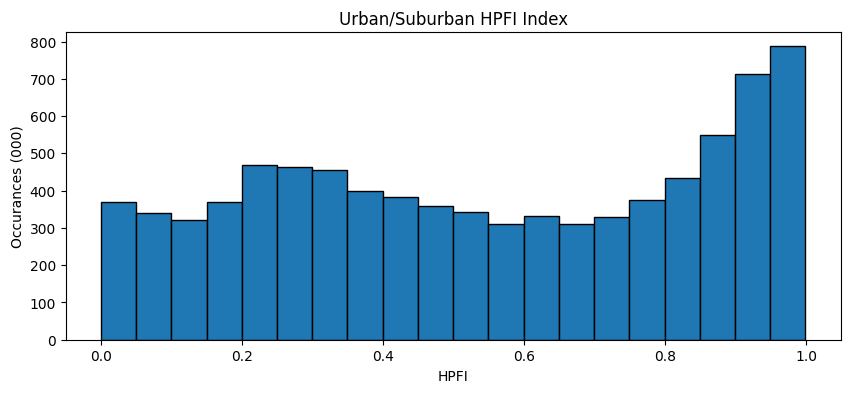

In [109]:
urban = sample_df[sample_df['Density'] > 100]
plt.figure(figsize=(10, 4))
plt.title(f'Urban/Suburban HPFI Index')
plt.xlabel('HPFI')
plt.ylabel('Occurances (000)')
plt.hist(urban['HPFI'].to_list(), bins=20, edgecolor="black")

(array([ 17.,  29.,  46.,  50.,  73.,  87.,  82.,  82.,  79.,  64.,  59.,
         55.,  67.,  62.,  57.,  80.,  78.,  94., 125., 164.]),
 array([0.00657487, 0.05610579, 0.1056367 , 0.15516762, 0.20469853,
        0.25422945, 0.30376036, 0.35329128, 0.4028222 , 0.45235311,
        0.50188403, 0.55141494, 0.60094586, 0.65047678, 0.70000769,
        0.74953861, 0.79906952, 0.84860044, 0.89813135, 0.94766227,
        0.99719319]),
 <BarContainer object of 20 artists>)

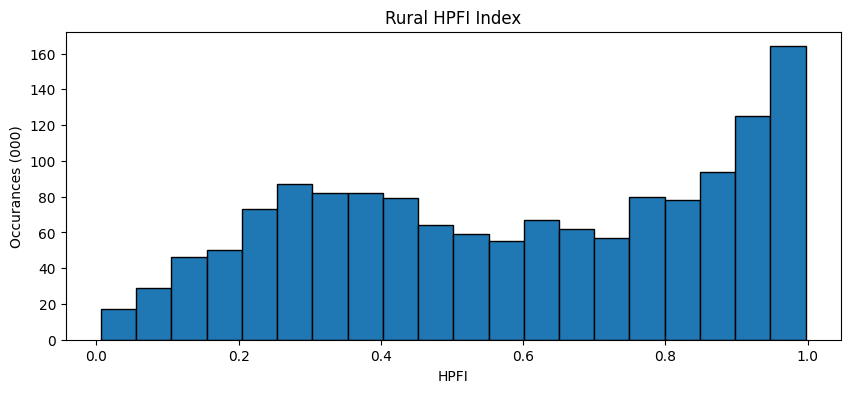

In [108]:
rural = sample_df[sample_df['Density'] < 100]
plt.figure(figsize=(10, 4))
plt.title(f'Rural HPFI Index')
plt.xlabel('HPFI')
plt.ylabel('Occurances (000)')
plt.hist(rural['HPFI'].to_list(), bins=20, edgecolor="black")

In [105]:
len(rural[rural['HPFI'] > 0.5]) / len(rural)

0.5827586206896552

In [106]:
len(urban[urban['HPFI'] > 0.5]) / len(urban)

0.5326280755972899

In [107]:
len(urban) / len(sample_df)

0.8529859069248708